In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [6]:
# data load 
# train_df 
x_train_over_df = pd.read_csv('./oversampling_dataset/x_train_over_df.csv')
n_y_train_over_df = pd.read_csv('./oversampling_dataset/n_y_train_over_df.csv')
# test_df
test_data_df = pd.read_csv('./oversampling_dataset/test_data_df.csv')
n_test_label_df = pd.read_csv('./oversampling_dataset/n_test_label_df.csv')

In [7]:
print(x_train_over_df.shape)
print(n_y_train_over_df.shape)
print(test_data_df.shape)
print(n_test_label_df.shape)

(156816, 140)
(156816, 1)
(36557, 140)
(36557, 1)


### Randomforest model 

In [12]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
# model train
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train_over_df, n_y_train_over_df)

C:\Users\User\AppData\Local\Temp\ipykernel_24836\1993867447.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train_over_df, n_y_train_over_df)


RandomForestClassifier(random_state=0)

In [10]:
# y값 예측하기
y_pred = rfc.predict(test_data_df)

In [11]:
# acc
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(n_test_label_df, y_pred)))

Model accuracy score: 0.9273


### Decision Tree

In [18]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
# model train
# clf = DecisionTreeClassifier()
# clf.fit(x_train_over_df, n_y_train_over_df)

DecisionTreeClassifier()

In [37]:
clf = DecisionTreeClassifier(
            criterion='entropy', ## 'gini', 'log_loss'
            splitter='best', ## 'random'
            max_depth=100, ## '최대 깊이'
            min_samples_leaf=1, ## 최소 끝마디 샘플 수
            random_state=100
        ).fit(x_train_over_df, n_y_train_over_df)

In [38]:
# y값 예측하기
y_pred = clf.predict(test_data_df)

In [39]:
# acc 체점
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(n_test_label_df, y_pred)))

Model accuracy score: 0.8581


In [40]:
from sklearn.metrics import classification_report
print(classification_report(n_test_label_df, y_pred)) 

print("Accuracy on Training set: {:.3f}".format(clf.score(x_train_over_df, n_y_train_over_df)))
print("Accuracy on Test set: {:.3f}".format(clf.score(test_data_df, n_test_label_df)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     33603
           1       0.19      0.24      0.21      2954

    accuracy                           0.86     36557
   macro avg       0.56      0.58      0.57     36557
weighted avg       0.87      0.86      0.86     36557

Accuracy on Training set: 1.000
Accuracy on Test set: 0.858


- overfitting ^-^.. max_depth 100개 미만, 이상으로도 지정해봤는 데 계속 오버피팅 발생하더라구요 어차피 recall지수도 낮아서 다른 모델 써야할 것 같긴 하다만 일단 이건 이렇게까지만 할까요?


### Paycaret

- AutoML 하게 해주는 파이썬 라이브러리

In [1]:
# !pip install pycaret

In [15]:
# import numpy as np
# import pandas as pd

# # data load 
# # Original dataframe 
# train_dataset = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')
# test_dataset = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv') # 정답 x 

In [2]:
from pycaret.classification import *

In [ ]:
train_dataset.select_dtypes(include='object').columns

  paycaret은 다른 파일에서 다시 해보겠습니다. 

### Preprocessing 수정 후 재작업

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from Preprocessing import Preprocessing
from sklearn.ensemble import RandomForestClassifier

In [4]:
preprocessing_db = Preprocessing()

# data load 과정에서 nan값 등 결측치 처리 
preprocessing_db.__init__()
# 결측치가 너무 많아 쓸 수 없다 판단되는 컬럼들 제거 
preprocessing_db.drop_columns()
# 범주형 데이터 대체
preprocessing_db.category_columns_replace()
# 연속형 데이터 대체
preprocessing_db.numerical_columns_replace()

In [9]:
# x data return 
x_df = preprocessing_db.get_df()
# targer data return 
target_df = preprocessing_db.get_target_df()

In [10]:
print(x_df.shape)
print(target_df.shape)

(121856, 45)
(121856,)


In [11]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Child_Count                     121856 non-null  float64
 1   Credit_Amount                   121856 non-null  float64
 2   Loan_Annuity                    121856 non-null  float64
 3   Client_Income_Type              121856 non-null  object 
 4   Client_Education                121856 non-null  object 
 5   Client_Marital_Status           121856 non-null  object 
 6   Client_Gender                   121856 non-null  object 
 7   Loan_Contract_Type              121856 non-null  object 
 8   Client_Housing_Type             121856 non-null  object 
 9   Population_Region_Relative      121856 non-null  float64
 10  Age_Days                        121856 non-null  float64
 11  Employed_Days                   121856 non-null  float64
 12  Registration_Day

In [14]:
# 범주형 컬럼 원핫 인코딩
catecorical_columns = ['Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender',
                      'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation']
train_df = pd.get_dummies(x_df, columns=catecorical_columns)

In [15]:
train_df.head()

,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Score_Source_2,...,Client_Occupation_Low-skill Laborers,Client_Occupation_Managers,Client_Occupation_Medicine,Client_Occupation_Nojob,Client_Occupation_Private service,Client_Occupation_Realty agents,Client_Occupation_Sales,Client_Occupation_Secretaries,Client_Occupation_Security,Client_Occupation_Waiters/barmen
0,0.0,61190.55,3416.85,0.028663,13957.0,1062.0,6123.000000,383.0,2.0,0.478787,...,0,0,0,0,0,0,1,0,0,0
1,0.0,15282.00,1826.55,0.008575,14162.0,4129.0,7833.000000,21.0,2.0,0.215068,...,0,0,0,1,0,0,0,0,0,0
2,1.0,59527.35,2788.20,0.022800,16790.0,5102.0,4975.162123,331.0,2.0,0.552795,...,0,0,0,0,0,1,0,0,0,0
3,0.0,53870.40,2295.45,0.010556,23195.0,365243.0,4975.162123,775.0,2.0,0.135182,...,0,0,0,1,0,0,0,0,0,0
4,2.0,133988.40,3547.35,0.020713,11366.0,2977.0,5516.000000,4043.0,4.0,0.301182,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# train & test data split 
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(train_df, target_df,
                                                                  test_size=0.3, 
                                                                  stratify=target_df,
                                                                  random_state=42)

## Random Forest

In [21]:
# data load 
# train_df 
x_train_over_df = pd.read_csv('./oversampling_dataset/x_train_over_df.csv')
y_train_over_df = pd.read_csv('./oversampling_dataset/y_train_over_df.csv')
# test_df
test_data_df = pd.read_csv('./oversampling_dataset/test_data_df.csv')
test_label_df = pd.read_csv('./oversampling_dataset/test_label_df.csv')

In [22]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# from sklearn.model_selection import GridSearchCV
# 오래 걸리는 관계로 pass

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(x_train_over_df, y_train_over_df)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [29]:
# model train
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train_over_df, y_train_over_df)

RandomForestClassifier(random_state=0)

In [30]:
# y값 예측하기
y_pred = rfc.predict(test_data_df)

In [31]:
# acc
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(test_label_df, y_pred)))

Model accuracy score: 0.9270


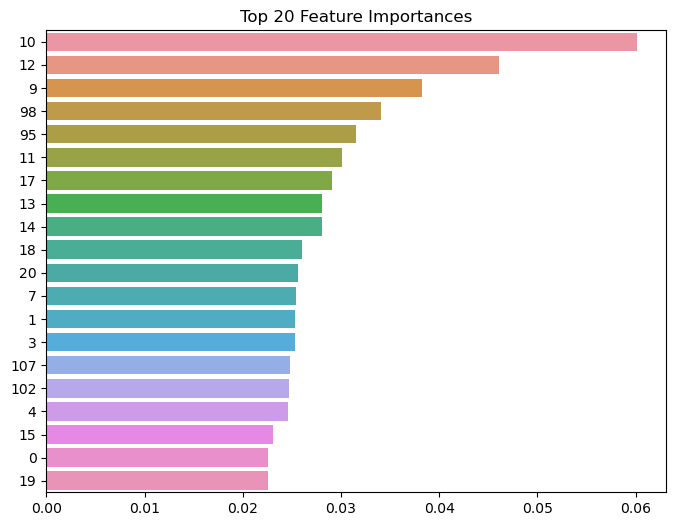

In [33]:
# Feature imfortances
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train_over_df.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## Decision Tree

In [34]:
# import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
clf = DecisionTreeClassifier(
            criterion='entropy', ## 'gini', 'log_loss'
            splitter='best', ## 'random'
            max_depth=30, ## '최대 깊이'
            min_samples_leaf=1, ## 최소 끝마디 샘플 수
            random_state=100
        ).fit(x_train_over_df, n_y_train_over_df)

In [64]:
# y값 예측하기
y_pred = clf.predict(test_data_df)

In [65]:
# acc 체점
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(n_test_label_df, y_pred)))

Model accuracy score: 0.8594


In [66]:
from sklearn.metrics import classification_report
print(classification_report(n_test_label_df, y_pred)) 

print("Accuracy on Training set: {:.3f}".format(clf.score(x_train_over_df, n_y_train_over_df)))
print("Accuracy on Test set: {:.3f}".format(clf.score(test_data_df, n_test_label_df)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     33603
           1       0.19      0.23      0.21      2954

   micro avg       0.86      0.86      0.86     36557
   macro avg       0.56      0.57      0.57     36557
weighted avg       0.87      0.86      0.87     36557
 samples avg       0.86      0.86      0.86     36557

Accuracy on Training set: 0.998
Accuracy on Test set: 0.859


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> grid search가 오래 걸리는 관계로 수동으로 max_depth 수정하여 10단위로 넣은 결과 max_depth가 30을 넘어설 경우 overfiting 발생 (Accuracy on training set: 1) 